### TME4 SVM
#### binome: Yuhan WANG et Tianyu WANG

#### Partie I: SVM et Grid Search
Sur les donnees des precedents TMEs, explorer les noyeaux: lineraire, gaussien et polynomial.  
svm.SVC(C:float, kernel={linear,poly,rbf,sigmoid...},degree,gamma...)

In [1]:
from sklearn import svm
from arftools import *
from tme4_etu import *
from mpl_toolkits import mplot3d

#### 1.1 Premier test

In [2]:
trainx,trainy =  gen_arti(nbex=1000,data_type=0,epsilon=1)
testx,testy =  gen_arti(nbex=1000,data_type=0,epsilon=1)

In [3]:
svr_lin=svm.SVC(kernel='linear',C=100,gamma='auto').fit(trainx,trainy)

In [4]:
print("The accuracy under kenel linear is %f"%svr_lin.score(testx,testy))

The accuracy under kenel linear is 0.916000


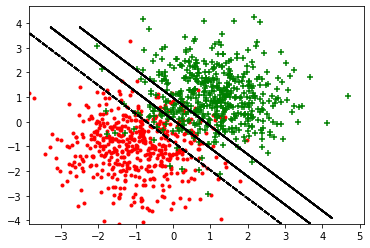

In [5]:
plt.figure()
plot_svc_decision_frontiere(svr_lin,ax=None,data=trainx)
plot_data(trainx,trainy)

In [6]:
svr_poly=svm.SVC(kernel='poly',C=100,degree=3,gamma='auto').fit(trainx,trainy)
print("The accuracy under kenel polynomial is %f"%svr_poly.score(testx,testy))

The accuracy under kenel polynomial is 0.903000


In [7]:
svr_gaussien=svm.SVC(kernel='rbf',C=100,gamma=0.1).fit(trainx,trainy)
print("The accuracy under kenel rbf is %f"%svr_gaussien.score(testx,testy))

The accuracy under kenel rbf is 0.912000


#### 1.2 test avec USPS

In [8]:
X,Y=load_usps("USPS_train.txt")
x,y=load_usps("USPS_test.txt")

In [9]:
train_X,train_Y = X[(Y==6)|(Y==9)],Y[(Y==6)|(Y==9)]
train_Y = np.where(train_Y==6,-1,1)
test_x,test_y = x[(y==6)|(y==9)],y[(y==6)|(y==9)]
test_y = np.where(test_y==6,-1,1)

In [10]:
svr_lin=svm.SVC(kernel='linear').fit(train_X,train_Y)
print("The accuracy under kenel linear is %f"%svr_lin.score(test_x,test_y))
svr_poly=svm.SVC(kernel='poly',degree=3,gamma='auto').fit(train_X,train_Y)
print("The accuracy under kenel poly is %f"%svr_poly.score(test_x,test_y))
svr_gaussien=svm.SVC(kernel='rbf',C=100,gamma=0.05).fit(train_X,train_Y)
print("The accuracy under kenel rbf is %f"%svr_gaussien.score(test_x,test_y))

The accuracy under kenel linear is 0.997118
The accuracy under kenel poly is 0.997118
The accuracy under kenel rbf is 0.968300


#### Conclusion1: 
Pour les donnees obtenues par gen_arti(type=0), c'est fonction gaussienne et lineare qui ont la meuilleure score. Mais kernel lineaire prend plus de temps a calculer. Kernel lineaire et polynomiale a des scores simulaires.  
#### Conclusion2:
Pour les donnees USPS, kernel lineaire fonctionne aussi bien que kernel polynomiale. En dimunuant le parametre gamma, kernel gaussienne joue mieux. Il faut donc trouver les meuilleurs parametres.

#### 1.3 Grid Search: Ajuster les params pour kernel polynomial
| kernel function | gamma | degree | C |
| --- | --- | --- | --- |
|linear|Non|Non|Non|
|polynomial|Oui|Oui|Oui|
|Rbf|Oui|Non|Non|


In [11]:
gamma_range=np.logspace(-10,1,20)
c_range=np.linspace(0,5,10)

In [21]:
print(grid_search(gamma_range,c_range,trainx,trainy,testx,testy))

({'coef0': 4.444444444444445, 'gamma': 1.7575106248547893e-08}, 0.9266666666666665)


In [16]:
svc=svm.SVC(probability=True,kernel="poly",gamma=5.455594781168515,C=1.1)

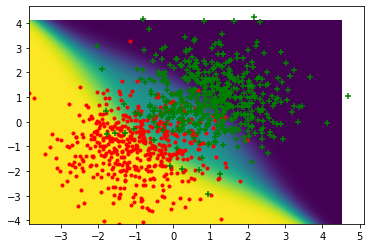

In [17]:
svc.fit(trainx,trainy)
plt.figure()
plot_frontiere_proba(trainx,lambda x:svc.predict_proba(x)[:,0],step=50)
plot_data(trainx,trainy)

0.904 0.003359818286283788
0.903


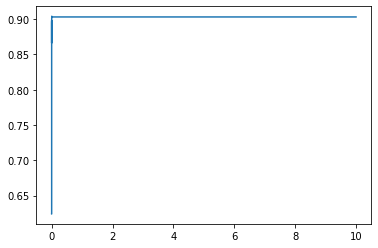

In [18]:
score=[]
C=np.linspace(0,5,20)

for i in gamma_range:
    clf = SVC(kernel="poly",C=i,gamma=7.84).fit(trainx,trainy)
    score.append(clf.score(testx,testy))
print(max(score),gamma_range[score.index(max(score))])
plt.plot(gamma_range,score)

clf2=SVC(kernel="poly",C=2.7,gamma=7.84).fit(trainx,trainy)
print(clf.score(testx,testy))

#### Conclusion3: 
apres ajustement des params, le kernel polynomial peut avoir un mieux resultat en comparant avec kernel gaussienne non ajuste.

#### 1.4 Ajuster gamma pour kernel gaussienne

0.918 1e-10


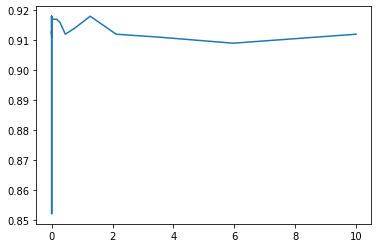

In [19]:
gamma_range=np.logspace(-10,1,50)
kernel="rbf"
plot_erreur(gamma_range,kernel,trainx,trainy,testx,testy)

### Partie II: régularisation de Tikhonov